In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.simplefilter('ignore')

The [dataset](http://archive.ics.uci.edu/ml/datasets/Poker+Hand) we'll be exploring in this post is the Poker Hand data from the UCI Machine Learning Repository.

Each record in the dataset is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. The target column describes the hand, with the possibilities being:    

    0: Nothing in hand; not a recognized poker hand     
    1: One pair; one pair of equal ranks within five cards     
    2: Two pairs; two pairs of equal ranks within five cards     
    3: Three of a kind; three equal ranks within five cards     
    4: Straight; five cards, sequentially ranked with no gaps     
    5: Flush; five cards with the same suit     
    6: Full house; pair + different rank three of a kind     
    7: Four of a kind; four equal ranks within five cards     
    8: Straight flush; straight + flush     
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush     
    
The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for each suit).

In [2]:
poker_df = pd.read_csv('poker-hand-testing.data')

In [3]:
# Manually label the columns and classes based on the dataset description from the UCI Repository
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 
                    'third_suit', 'third_rank', 'fourth_suit', 'fourth_rank', 
                    'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 
                   'straight', 'flush', 'full_house', 'four_of_a_kind', 
                   'straight_flush', 'royal_flush']

In [4]:
poker_df.head()

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [5]:
X = poker_df.iloc[:,:9]
y = poker_df.hand 

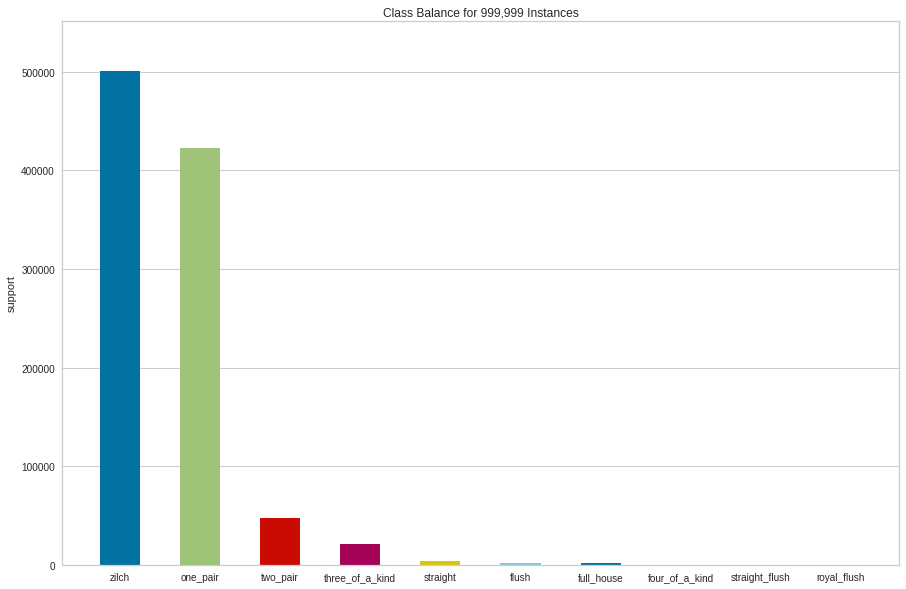

In [6]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
    
balance = ClassBalance(size = (1080, 720), labels = labels)

balance.fit(y)

balance.poof();

In [7]:
poker_df.loc[poker_df['hand'] >= 5, 'hand'] = 5

y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 
          'straight', 'flush_or_better']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

clf = RandomForestClassifier(n_estimators = 100,
                            class_weight = 'balanced',
                            n_jobs = -1)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [9]:
y_pred = clf.predict(x_test)


from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6805966666666666


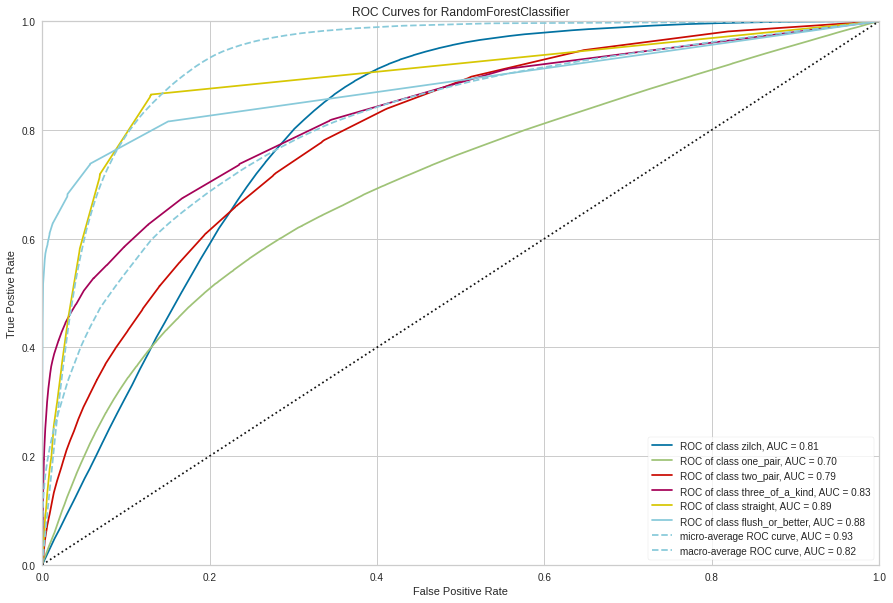

In [10]:
from yellowbrick.classifier import ROCAUC

rocauc = ROCAUC(clf, size = (1080, 720), classes = labels)

rocauc.score(x_test, y_test)
rocauc.poof();

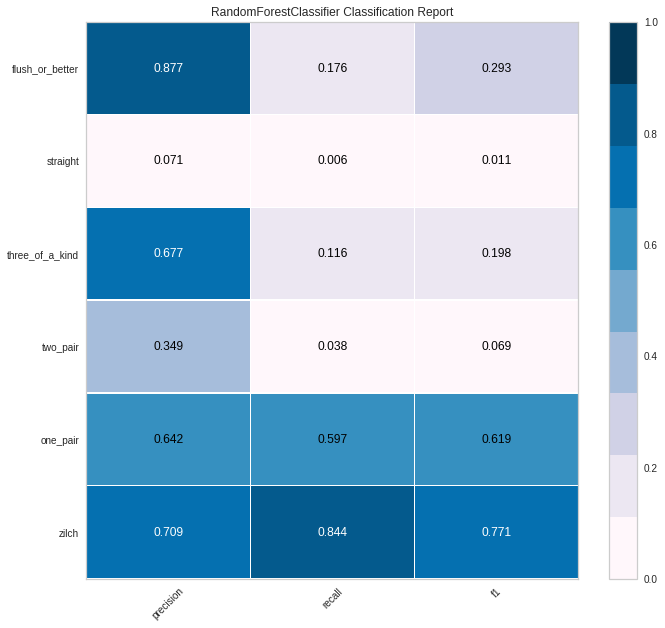

In [12]:
report = ClassificationReport(clf, size = (720, 640), classes = labels,
                              cmap = 'PuBu')
report.score(x_test, y_test)
report.poof()

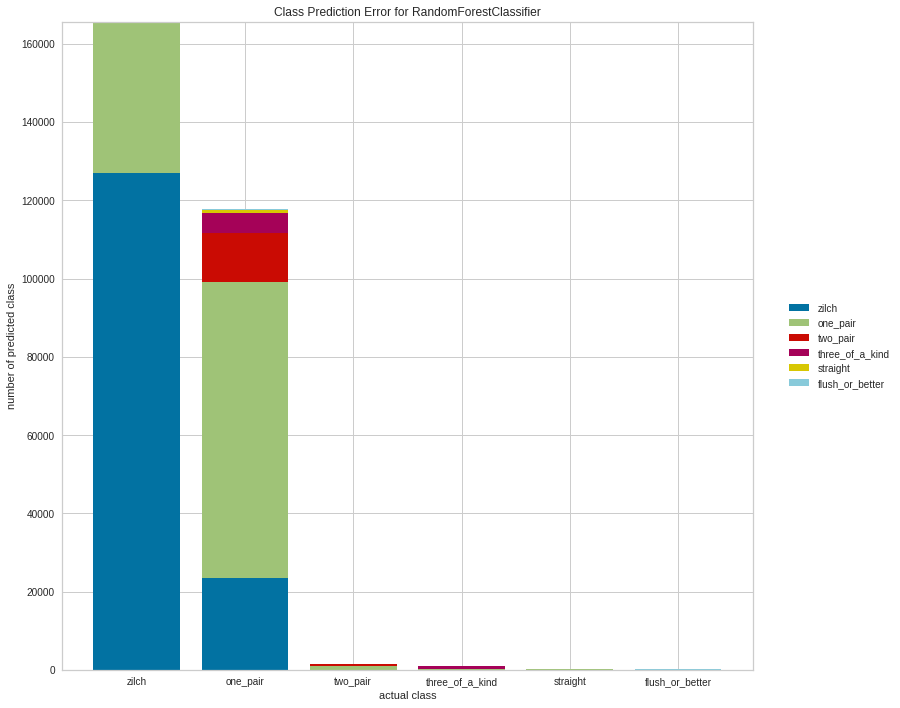

In [13]:
error = ClassPredictionError(clf, size = (1080, 720), classes = labels)
error.score(x_test, y_test)
error.poof();